Importing libaries

In [34]:
import pandas as pd
import numpy as np
import os
import time
import pmdarima 
import statsmodels.tsa.arima.model
from matplotlib import pyplot as plt
plt.style.use(style="seaborn")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [35]:
df=pd.read_csv('Stock_Price_data_set_(1).csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/5/2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2/6/2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2/7/2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2/8/2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2/9/2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,1/31/2022,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2/1/2022,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2/2/2022,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2/3/2022,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [36]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/5/2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2/6/2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2/7/2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2/8/2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2/9/2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [37]:
df.shape

(1009, 7)

In [38]:
df.index

RangeIndex(start=0, stop=1009, step=1)

In [39]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [40]:
df.info

<bound method DataFrame.info of            Date        Open        High         Low       Close   Adj Close  \
0      2/5/2018  262.000000  267.899994  250.029999  254.259995  254.259995   
1      2/6/2018  247.699997  266.700012  245.000000  265.720001  265.720001   
2      2/7/2018  266.579987  272.450012  264.329987  264.559998  264.559998   
3      2/8/2018  267.079987  267.619995  250.000000  250.100006  250.100006   
4      2/9/2018  253.850006  255.800003  236.110001  249.470001  249.470001   
...         ...         ...         ...         ...         ...         ...   
1004  1/31/2022  401.970001  427.700012  398.200012  427.140015  427.140015   
1005   2/1/2022  432.959991  458.480011  425.540009  457.130005  457.130005   
1006   2/2/2022  448.250000  451.980011  426.480011  429.480011  429.480011   
1007   2/3/2022  421.440002  429.260010  404.279999  405.600006  405.600006   
1008   2/4/2022  407.309998  412.769989  396.640015  410.170013  410.170013   

        Volume  
0 

In [41]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [42]:
df.count()

Date         1009
Open         1009
High         1009
Low          1009
Close        1009
Adj Close    1009
Volume       1009
dtype: int64

In [43]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [44]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [45]:
df=df[["Close"]].copy()
df.describe()

,Close
count,1009.000000
mean,419.000733
std,108.289999
min,233.880005
25%,331.619995
50%,378.670013
75%,509.079987
max,691.690002


In [46]:
df_train=df[:900]
df_test=df[900:]

<Figure size 2000x800 with 0 Axes>

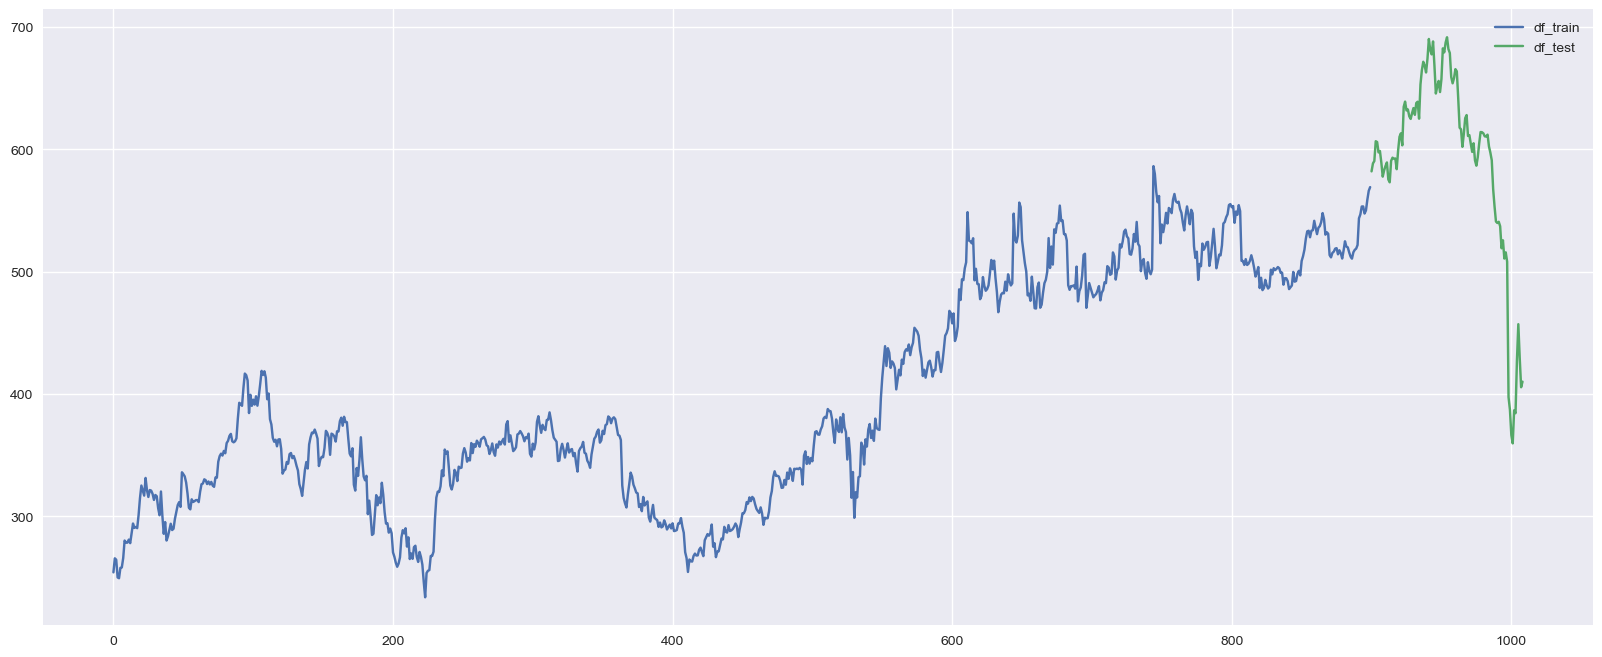

In [47]:
plt.figure(figsize=(20,8))
ax=df_train.plot(figsize=(20,8))
df_test.plot(ax=ax,grid=True)
plt.legend(['df_train','df_test'])
plt.show()

model for forecasting

In [48]:
from statsmodels.graphics.tsaplots import plot_pacf , plot_acf

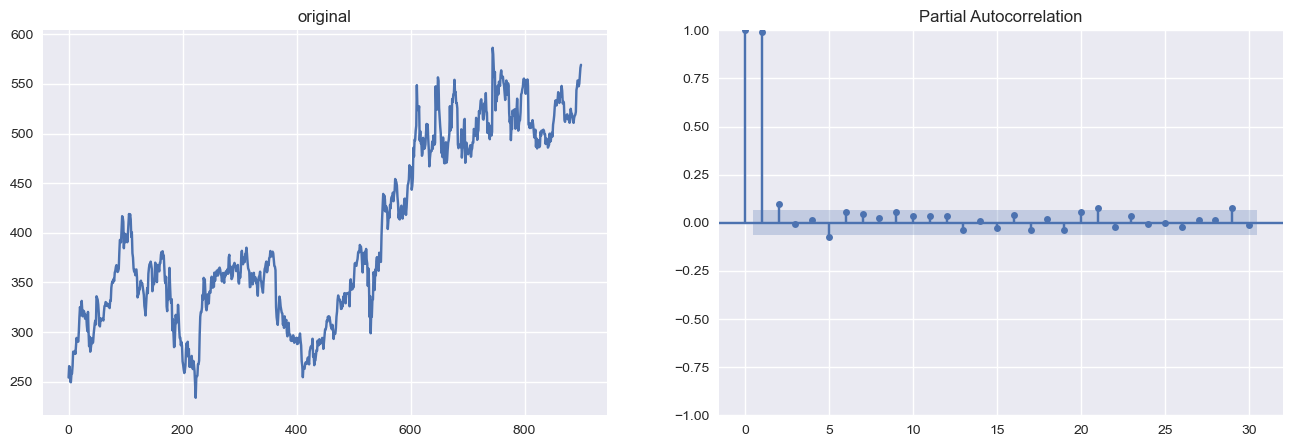

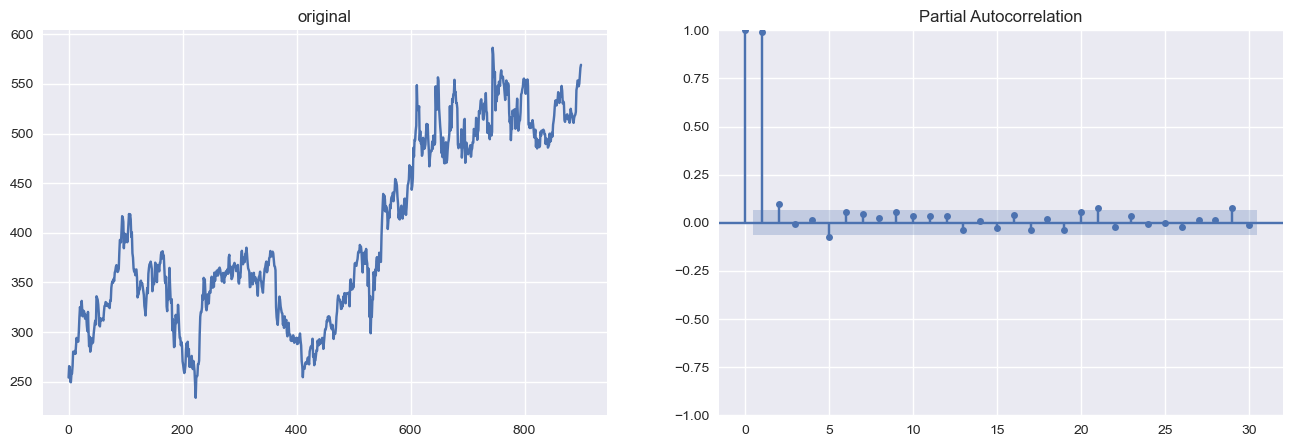

In [49]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(df_train.Close)
ax1.set_title("original")
plot_pacf(df_train.Close,ax=ax2)

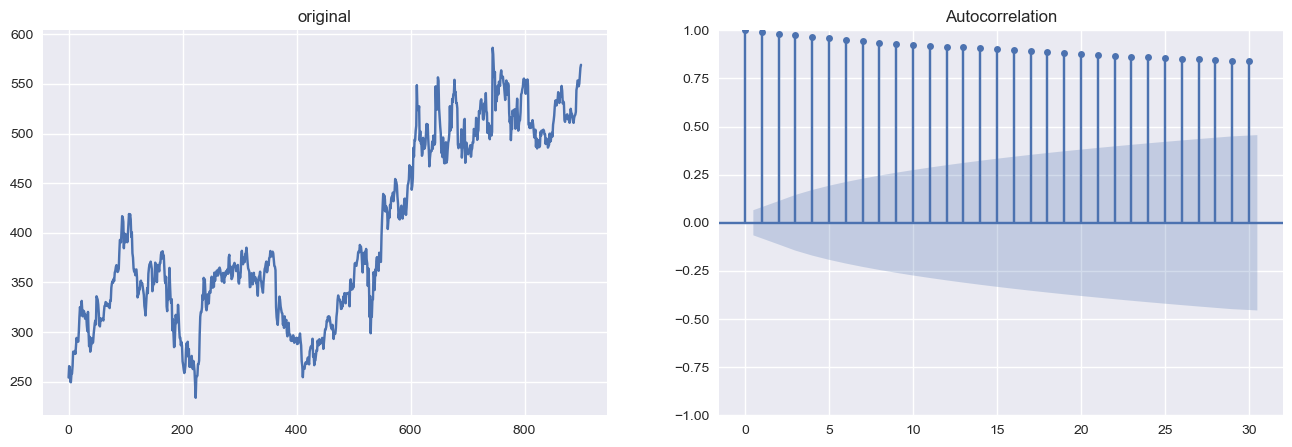

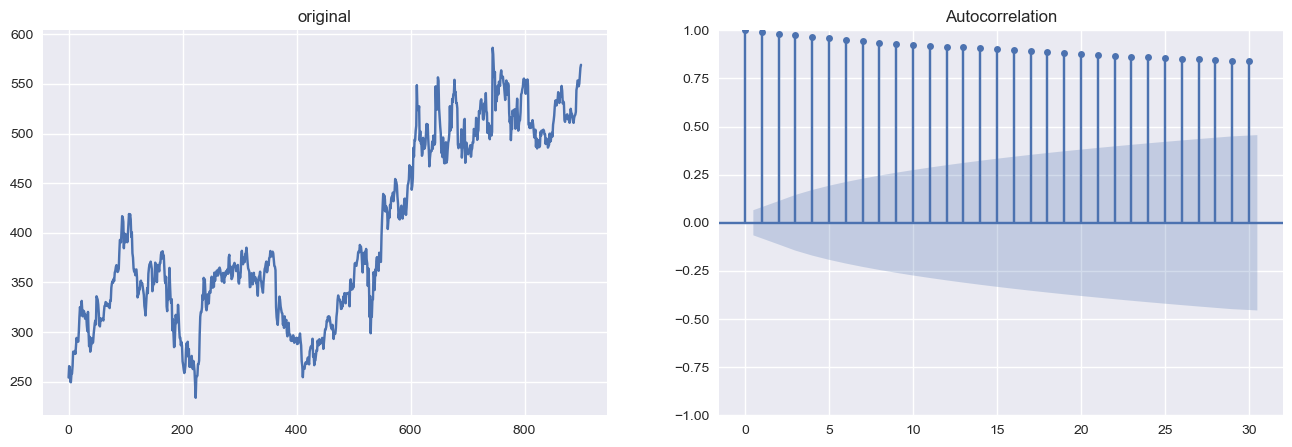

In [50]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(df_train.Close)
ax1.set_title("original")
plot_acf(df_train.Close,ax=ax2)

To find the value of p,d,q for fitting arima model

In [51]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df_train.Close.dropna())
print(f" ADF Statistic : {result[0]}")
print(f" p-value : {result[1]}")

 ADF Statistic : -1.1985723601640343
 p-value : 0.6742095448220732


To find d

In [52]:
from pmdarima.arima import ndiffs

adftest=ndiffs(df_train.Close,test="adf")  
kpsstest = ndiffs(df_train.Close, test = 'kpss')  
pptest = ndiffs(df_train.Close, test = 'pp')  
print("ADF Test =", adftest)  
print("KPSS Test =", kpsstest)  

print("PP Test =", pptest)  

ADF Test = 1
KPSS Test = 1
PP Test = 1


d=1

to find p

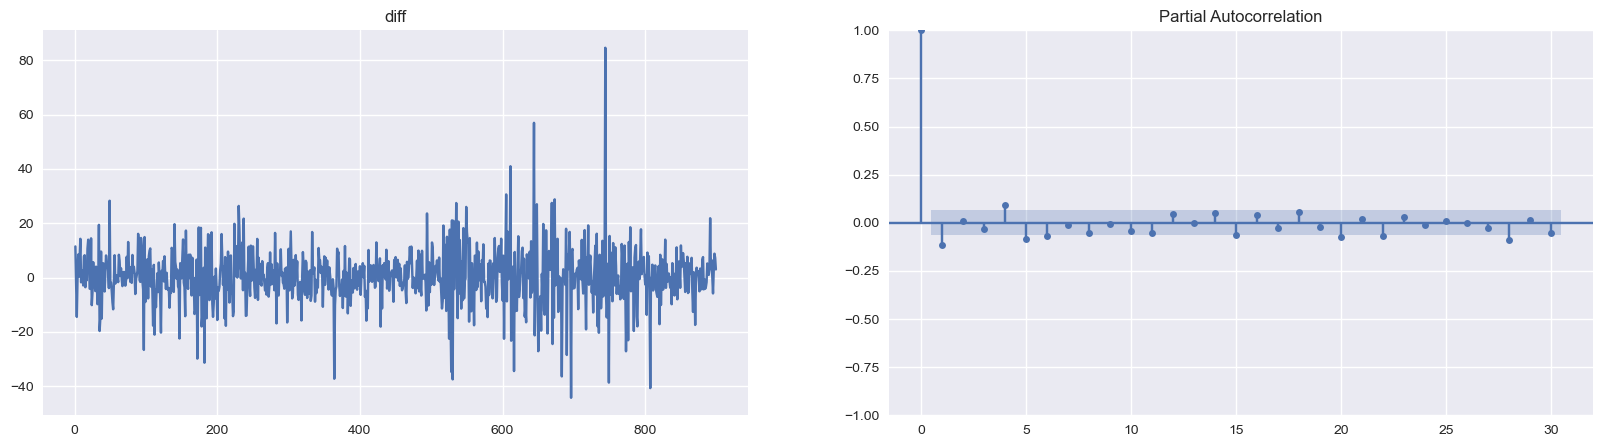

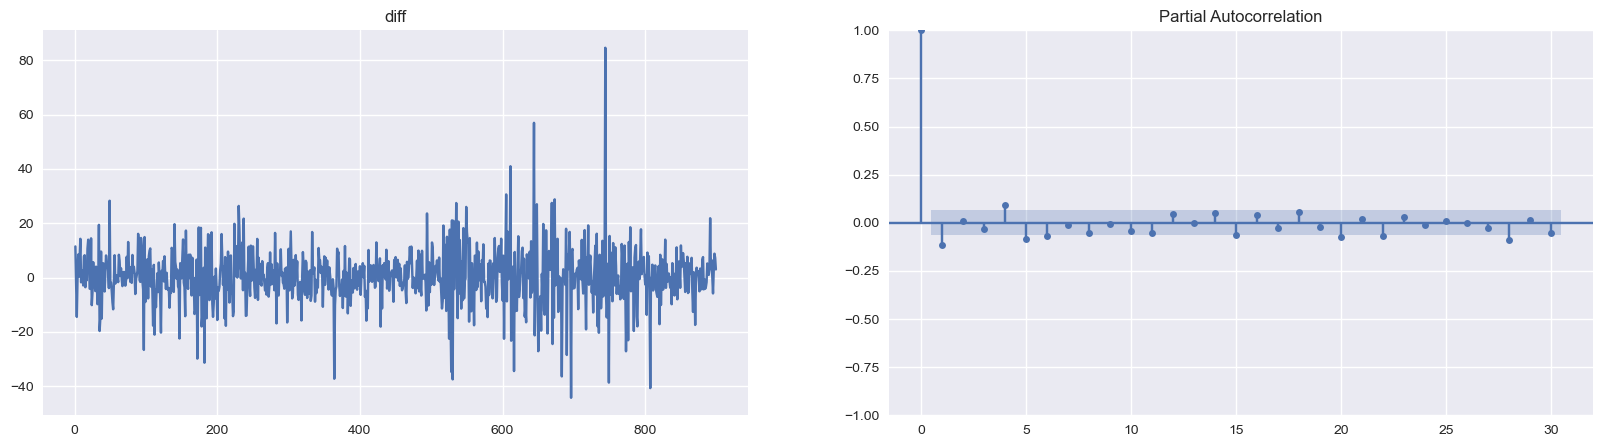

In [53]:
diff = df_train.Close.diff().dropna()
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.plot(diff)
ax1.set_title ("diff")
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2)

p=1

to find q

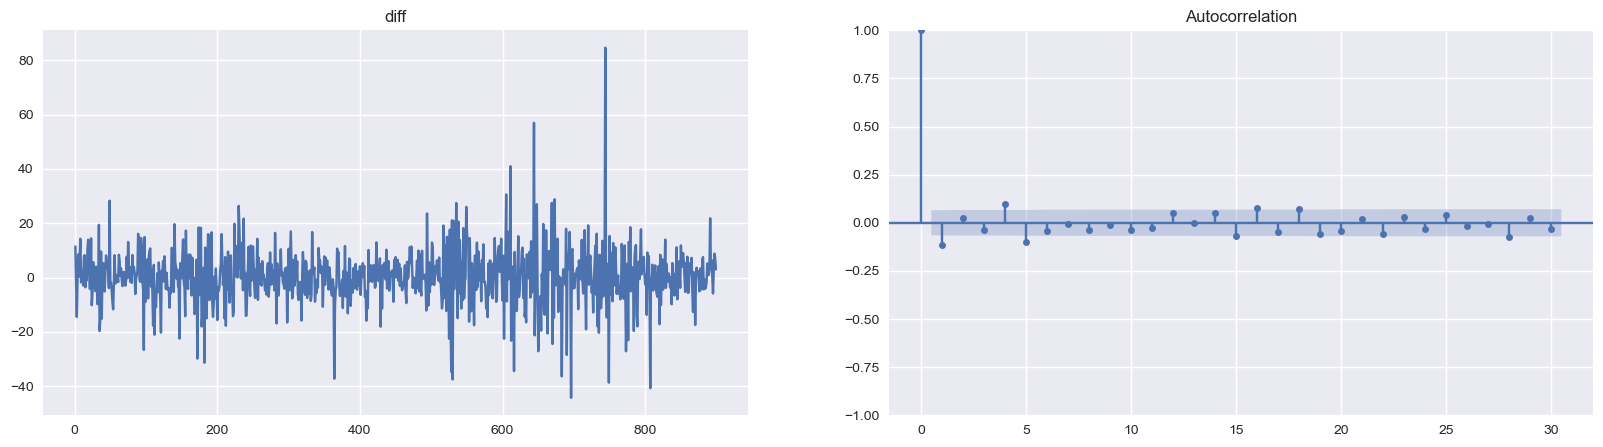

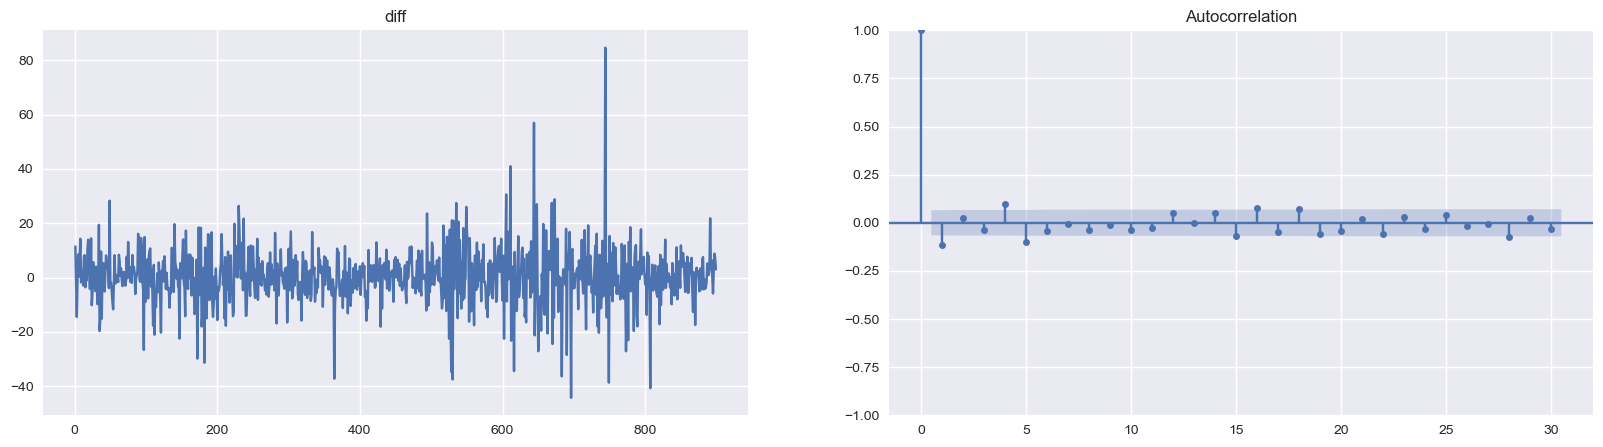

In [54]:
diff = df_train.Close.diff().dropna()
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.plot(diff)
ax1.set_title ("diff")
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2)

q=1

fitting arima model(p,d,q)=(1,1,1)

In [55]:
import statsmodels.api as smapi
model = smapi.tsa.arima.ARIMA(df_train.Close,order=(1,1,1))
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  900
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3357.344
Date:                Sat, 22 Jul 2023   AIC                           6720.687
Time:                        15:43:16   BIC                           6735.091
Sample:                             0   HQIC                          6726.190
                                - 900                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7603      0.100     -7.625      0.000      -0.956      -0.565
ma.L1          0.6774      0.116      5.851      0.000       0.450       0.904
sigma2       102.6306      2.315     44.334      0.000      98.093     107.168
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):              2227.58
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               1.85   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""


plottting residual error


(array([ 57., 799.,  41.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([-44.16867995, -14.32581245,  15.51705504,  45.35992254,
         75.20279003, 105.04565753, 134.88852502, 164.73139252,
        194.57426001, 224.41712751, 254.259995  ]),
 <BarContainer object of 10 artists>)

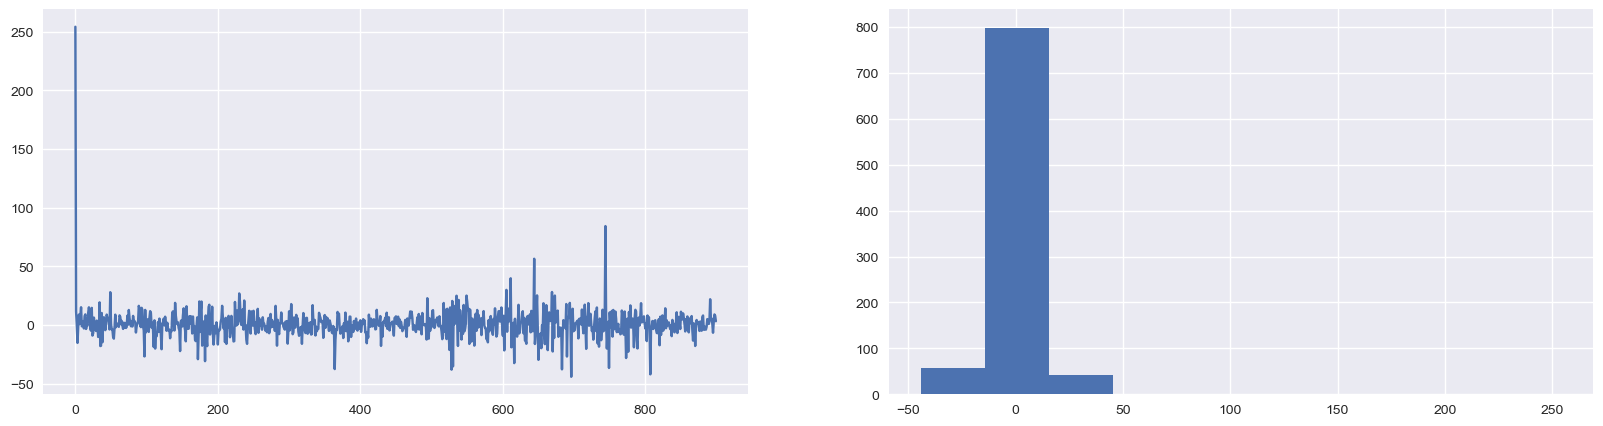

In [56]:
residuals = pd.DataFrame(result.resid)
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
ax1.plot(residuals) 
ax2.hist(residuals)

predict

In [57]:
df_train['prediction']=result.predict(start=0,end=900)
df_train

,Close,prediction
0,254.259995,0.000000
1,265.720001,254.257510
2,264.559998,264.647889
3,250.100006,265.382790
4,249.470001,250.775247
...,...,...
895,547.580017,554.188538
896,550.119995,547.535658
897,558.919983,549.939595
898,566.179993,558.313065


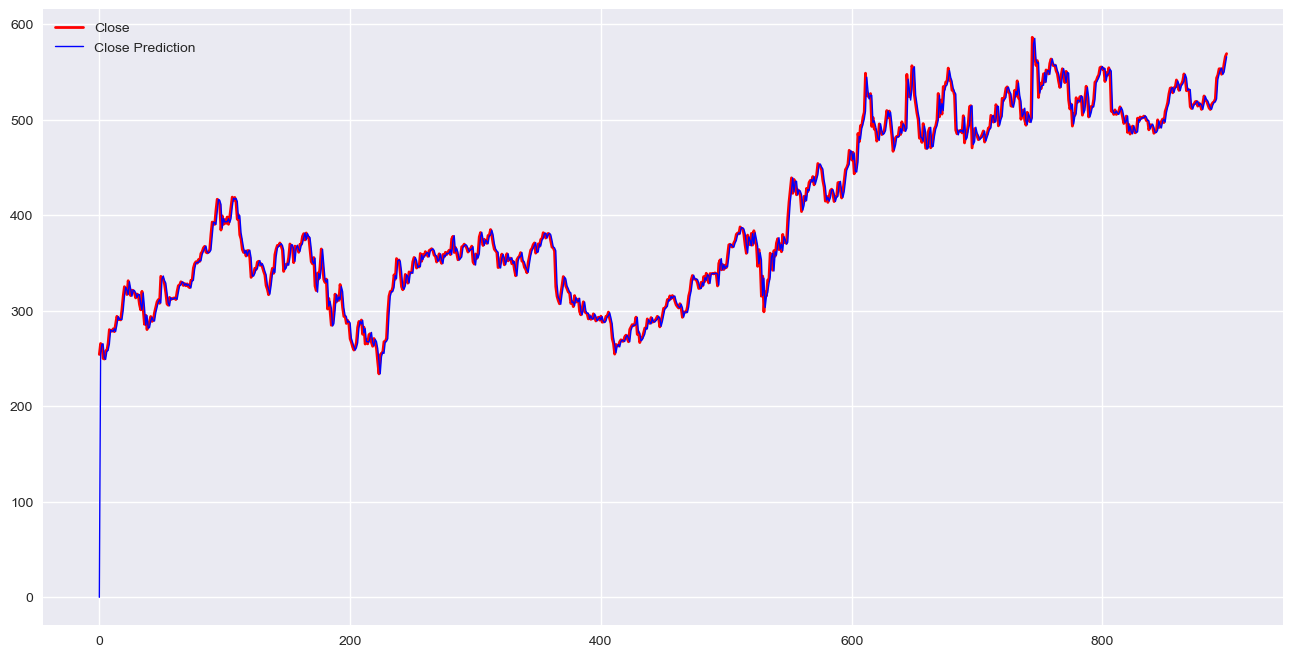

In [58]:
df_train['Close'].plot(figsize=(16,8),color='red',linewidth=2)
df_train['prediction'].plot(figsize=(16,8),color='blue',linewidth=1)
plt.legend(('Close','Close Prediction'))
plt.show()

In [59]:
# Forecast
fc= result.forecast(1009) 

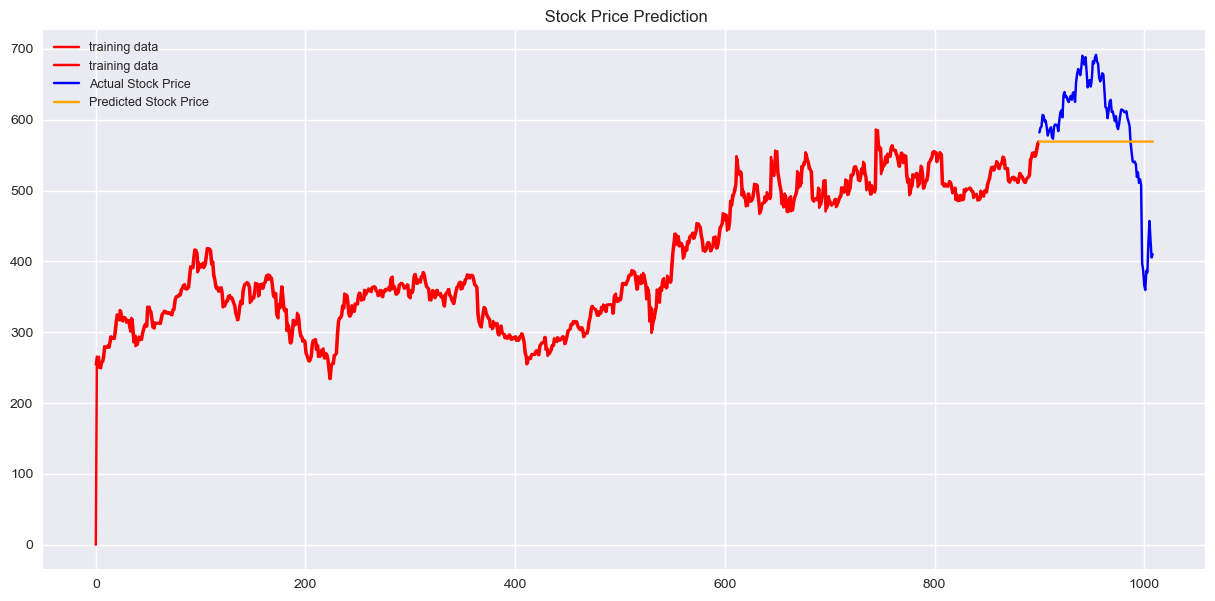

In [60]:
fc_series = pd.Series(fc, index=df_test.index)
plt.figure(figsize=(15,7))
plt.plot(df_train,color='red' ,label='training data')
plt.plot(df_test, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.title(' Stock Price Prediction')
plt.legend(loc='upper left', fontsize=9)
plt.show()